In [3]:
import pandas as pd
import numpy as np

# 数据离散化

In [4]:
data = pd.Series([165,174,160,180,159,163,192,184], index=['No1:165', 'No2:174', 'No3:160', 'No4:180', 'No5:159','No6:163', 'No7:192', 'No8:184'])

In [5]:
data

No1:165    165
No2:174    174
No3:160    160
No4:180    180
No5:159    159
No6:163    163
No7:192    192
No8:184    184
dtype: int64

In [14]:
#分组 - auto
sr = pd.qcut(data, 3)

In [10]:
sr

No1:165      (163.667, 178.0]
No2:174      (163.667, 178.0]
No3:160    (158.999, 163.667]
No4:180        (178.0, 192.0]
No5:159    (158.999, 163.667]
No6:163    (158.999, 163.667]
No7:192        (178.0, 192.0]
No8:184        (178.0, 192.0]
dtype: category
Categories (3, interval[float64, right]): [(158.999, 163.667] < (163.667, 178.0] < (178.0, 192.0]]

In [11]:
pd.get_dummies(sr, prefix='height')

,"height_(158.999, 163.667]","height_(163.667, 178.0]","height_(178.0, 192.0]"
No1:165,False,True,False
No2:174,False,True,False
No3:160,True,False,False
No4:180,False,False,True
No5:159,True,False,False
No6:163,True,False,False
No7:192,False,False,True
No8:184,False,False,True


In [12]:
sr.value_counts()

(158.999, 163.667]    3
(178.0, 192.0]        3
(163.667, 178.0]      2
Name: count, dtype: int64

In [15]:
# grouping - custom
bins = [150,165,180,195]
sr = pd.cut(data, bins)

In [16]:
sr

No1:165    (150, 165]
No2:174    (165, 180]
No3:160    (150, 165]
No4:180    (165, 180]
No5:159    (150, 165]
No6:163    (150, 165]
No7:192    (180, 195]
No8:184    (180, 195]
dtype: category
Categories (3, interval[int64, right]): [(150, 165] < (165, 180] < (180, 195]]

In [18]:
pd.get_dummies(sr, prefix='height').astype("int32")

,"height_(150, 165]","height_(165, 180]","height_(180, 195]"
No1:165,1,0,0
No2:174,0,1,0
No3:160,1,0,0
No4:180,0,1,0
No5:159,1,0,0
No6:163,1,0,0
No7:192,0,0,1
No8:184,0,0,1


In [19]:
sr.value_counts()

(150, 165]    4
(165, 180]    2
(180, 195]    2
Name: count, dtype: int64

In [20]:
stock = pd.read_hdf("stock.h5")

In [22]:
stock.head()

,Open,High,Low,Close,Volume,Price_Change,P_Change,Turnover
2023-01-16,156.0,161,152,158,7542,3,1.94,124476
2023-01-17,158.0,163,155,160,6493,2,1.27,103888
2023-01-18,160.0,165,157,162,7321,2,1.25,118052
2023-01-19,162.0,167,160,165,6974,3,1.85,111925
2023-01-20,165.0,169,163,167,6723,2,1.21,110691


In [23]:
p_change = stock.P_Change

In [24]:
sr = pd.qcut(p_change, 10)

In [25]:
sr.value_counts()

P_Change
(0.729, 0.799]    10
(0.799, 0.868]    10
(0.868, 0.927]    10
(0.927, 0.966]    10
(0.966, 1.025]    10
(1.025, 1.094]    10
(1.094, 1.173]    10
(1.173, 1.302]    10
(1.302, 1.49]     10
(1.49, 81.0]      10
Name: count, dtype: int64

In [28]:
stock_change = pd.get_dummies(sr, prefix='Price changes', dtype='int')

# Data merge
## Array concatenation

In [30]:
stock.head()

,Open,High,Low,Close,Volume,Price_Change,P_Change,Turnover
2023-01-16,156.0,161,152,158,7542,3,1.94,124476
2023-01-17,158.0,163,155,160,6493,2,1.27,103888
2023-01-18,160.0,165,157,162,7321,2,1.25,118052
2023-01-19,162.0,167,160,165,6974,3,1.85,111925
2023-01-20,165.0,169,163,167,6723,2,1.21,110691


In [31]:
stock_change.head()

,"Price changes_(0.729, 0.799]","Price changes_(0.799, 0.868]","Price changes_(0.868, 0.927]","Price changes_(0.927, 0.966]","Price changes_(0.966, 1.025]","Price changes_(1.025, 1.094]","Price changes_(1.094, 1.173]","Price changes_(1.173, 1.302]","Price changes_(1.302, 1.49]","Price changes_(1.49, 81.0]"
2023-01-16,0,0,0,0,0,0,0,0,0,1
2023-01-17,0,0,0,0,0,0,0,1,0,0
2023-01-18,0,0,0,0,0,0,0,1,0,0
2023-01-19,0,0,0,0,0,0,0,0,0,1
2023-01-20,0,0,0,0,0,0,0,1,0,0


In [34]:
pd.concat([stock, stock_change], axis=1)

,Open,High,Low,Close,Volume,Price_Change,P_Change,Turnover,"Price changes_(0.729, 0.799]","Price changes_(0.799, 0.868]","Price changes_(0.868, 0.927]","Price changes_(0.927, 0.966]","Price changes_(0.966, 1.025]","Price changes_(1.025, 1.094]","Price changes_(1.094, 1.173]","Price changes_(1.173, 1.302]","Price changes_(1.302, 1.49]","Price changes_(1.49, 81.0]"
2023-01-16,156.0,161,152,158,7542,3,1.94,124476,0,0,0,0,0,0,0,0,0,1
2023-01-17,158.0,163,155,160,6493,2,1.27,103888,0,0,0,0,0,0,0,1,0,0
2023-01-18,160.0,165,157,162,7321,2,1.25,118052,0,0,0,0,0,0,0,1,0,0
2023-01-19,162.0,167,160,165,6974,3,1.85,111925,0,0,0,0,0,0,0,0,0,1
2023-01-20,165.0,169,163,167,6723,2,1.21,110691,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-21,426.0,431,424,430,7941,4,0.94,409684,0,0,0,1,0,0,0,0,0,0
2023-04-22,430.0,435,428,433,8274,3,0.93,413142,0,0,0,1,0,0,0,0,0,0
2023-04-23,433.0,438,431,436,7907,3,0.92,416602,0,0,1,0,0,0,0,0,0,0
2023-04-24,436.0,441,434,439,8240,3,0.92,419064,0,0,1,0,0,0,0,0,0,0


## Array merge

In [40]:
left = pd.DataFrame({"key1": ['K0','K0','K1','K2'],
                    "key2": ['K0','K1','K0','K1'],
                    "A": ['A0','A1','A2','A3'],
                    'B': ['B0','B1','B2','B3']})

right = pd.DataFrame({"key1": ['K0','K1','K1','K2'],
                    "key2": ['K0','K0','K0','K0'],
                    "C": ['C0','C1','C2','C3'],
                    'D': ['D0','D1','D2','D3']})

In [41]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [42]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [45]:
pd.merge(left,right, on=['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [46]:
pd.merge(left,right, how='left', on=['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [47]:
pd.merge(left,right, how='right', on=['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [48]:
pd.merge(left,right, how='outer', on=['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K0,NaN,NaN,C3,D3
5,K2,K1,A3,B3,NaN,NaN


# Crosstab

In [50]:
stock.head()

,Open,High,Low,Close,Volume,Price_Change,P_Change,Turnover
2023-01-16,156.0,161,152,158,7542,3,1.94,124476
2023-01-17,158.0,163,155,160,6493,2,1.27,103888
2023-01-18,160.0,165,157,162,7321,2,1.25,118052
2023-01-19,162.0,167,160,165,6974,3,1.85,111925
2023-01-20,165.0,169,163,167,6723,2,1.21,110691


In [52]:
dates = pd.to_datetime(stock.index)

In [55]:
dates.weekday

Index([0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1],
      dtype='int32')

In [56]:
dates.year

Index([2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
       2023, 2023, 2023, 2023],
      dtype='int32')

In [57]:
stock['week'] = dates.weekday

In [58]:
stock.head()

,Open,High,Low,Close,Volume,Price_Change,P_Change,Turnover,week
2023-01-16,156.0,161,152,158,7542,3,1.94,124476,0
2023-01-17,158.0,163,155,160,6493,2,1.27,103888,1
2023-01-18,160.0,165,157,162,7321,2,1.25,118052,2
2023-01-19,162.0,167,160,165,6974,3,1.85,111925,3
2023-01-20,165.0,169,163,167,6723,2,1.21,110691,4


In [59]:
stock['price_change'] = np.where(stock['P_Change'] > 0, 1, 0)

In [67]:
#stock['price_change'][dates.weekday==2] = 0
stock.loc[dates.weekday==2,'price_change'] = 0

In [68]:
pd.crosstab(stock['week'],stock['price_change'])

price_change,0,1
week,,
0,0,15
1,0,15
2,14,0
3,0,14
4,0,14
5,0,14
6,0,14


In [71]:
stock_copy = stock.copy()

In [72]:
stock_copy

,Open,High,Low,Close,Volume,Price_Change,P_Change,Turnover,week,price_change
2023-01-16,156.0,161,152,158,7542,3,1.94,124476,0,1
2023-01-17,158.0,163,155,160,6493,2,1.27,103888,1,1
2023-01-18,160.0,165,157,162,7321,2,1.25,118052,2,0
2023-01-19,162.0,167,160,165,6974,3,1.85,111925,3,1
2023-01-20,165.0,169,163,167,6723,2,1.21,110691,4,1
...,...,...,...,...,...,...,...,...,...,...
2023-04-21,426.0,431,424,430,7941,4,0.94,409684,4,1
2023-04-22,430.0,435,428,433,8274,3,0.93,413142,5,1
2023-04-23,433.0,438,431,436,7907,3,0.92,416602,6,1
2023-04-24,436.0,441,434,439,8240,3,0.92,419064,0,1


In [77]:
np.random.normal(1,3,100)

array([ 3.90819306, -2.56629328, -3.98223253, -0.91257039,  2.61750848,
       -4.29924819, -4.55617852,  9.18546455, -0.44578233,  0.27851466,
        0.80134978, -1.39982817,  6.8458787 ,  1.5548916 ,  0.48915157,
        5.94264596, -1.69634214,  1.49776554,  6.96781812, -4.74389146,
        4.72047129, -0.06349716,  0.82930235, -0.47902251,  0.2224633 ,
        1.50535251,  6.2714448 , -1.29302105,  1.82790607, -5.81422497,
       -1.05669521,  1.4842795 ,  1.55879541, -1.26499255, -0.50916279,
       -1.45339415, -1.29839472,  2.90289988, -1.28927872, -0.2145623 ,
        3.20171469,  1.75308689,  1.47986169,  4.31251678,  2.46049234,
       -5.71938284,  2.53239824,  5.65985468,  0.29759199,  3.78768439,
       -4.7843238 , -0.96211857,  5.8831045 ,  2.63234492,  4.66288251,
       -3.81880223,  3.16339902, -0.28965446,  2.65841438, -0.33704475,
        5.73616355, -0.60836918,  3.71180646,  1.15032893,  2.28045817,
       -0.83584372, -2.01739582,  0.13529808,  2.34950987,  1.08

In [78]:
stock_copy['P_Change']=np.random.normal(1,3,100)

In [79]:
stock_copy

,Open,High,Low,Close,Volume,Price_Change,P_Change,Turnover,week,price_change
2023-01-16,156.0,161,152,158,7542,3,-1.516036,124476,0,1
2023-01-17,158.0,163,155,160,6493,2,7.740808,103888,1,1
2023-01-18,160.0,165,157,162,7321,2,6.123608,118052,2,0
2023-01-19,162.0,167,160,165,6974,3,0.287968,111925,3,1
2023-01-20,165.0,169,163,167,6723,2,0.634086,110691,4,1
...,...,...,...,...,...,...,...,...,...,...
2023-04-21,426.0,431,424,430,7941,4,-3.100237,409684,4,1
2023-04-22,430.0,435,428,433,8274,3,5.979685,413142,5,1
2023-04-23,433.0,438,431,436,7907,3,-1.983544,416602,6,1
2023-04-24,436.0,441,434,439,8240,3,-0.228427,419064,0,1


In [80]:
stock_copy['price_change'] = np.where(stock_copy['P_Change'] > 0, 1, 0)

In [81]:
stock_copy

,Open,High,Low,Close,Volume,Price_Change,P_Change,Turnover,week,price_change
2023-01-16,156.0,161,152,158,7542,3,-1.516036,124476,0,0
2023-01-17,158.0,163,155,160,6493,2,7.740808,103888,1,1
2023-01-18,160.0,165,157,162,7321,2,6.123608,118052,2,1
2023-01-19,162.0,167,160,165,6974,3,0.287968,111925,3,1
2023-01-20,165.0,169,163,167,6723,2,0.634086,110691,4,1
...,...,...,...,...,...,...,...,...,...,...
2023-04-21,426.0,431,424,430,7941,4,-3.100237,409684,4,0
2023-04-22,430.0,435,428,433,8274,3,5.979685,413142,5,1
2023-04-23,433.0,438,431,436,7907,3,-1.983544,416602,6,0
2023-04-24,436.0,441,434,439,8240,3,-0.228427,419064,0,0


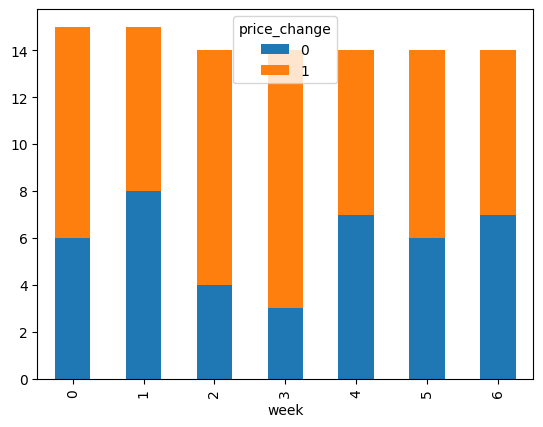

In [97]:
data = pd.crosstab(stock_copy['week'],stock_copy['price_change']).plot(kind='bar', stacked=True)

In [88]:
data.div(data.sum(axis=1), axis=0)

price_change,0,1
week,,
0,0.400000,0.600000
1,0.533333,0.466667
2,0.285714,0.714286
3,0.214286,0.785714
4,0.500000,0.500000
5,0.428571,0.571429
6,0.500000,0.500000


In [90]:
data

price_change,0,1
week,,
0,6,9
1,8,7
2,4,10
3,3,11
4,7,7
5,6,8
6,7,7


In [91]:
data.sum(axis=1)

week
0    15
1    15
2    14
3    14
4    14
5    14
6    14
dtype: int64

In [94]:
# use the wrong axis
data.div(data.sum(axis=1), axis=1)

,0,1,2,3,4,5,6
week,,,,,,,
0,0.400000,0.600000,NaN,NaN,NaN,NaN,NaN
1,0.533333,0.466667,NaN,NaN,NaN,NaN,NaN
2,0.266667,0.666667,NaN,NaN,NaN,NaN,NaN
3,0.200000,0.733333,NaN,NaN,NaN,NaN,NaN
4,0.466667,0.466667,NaN,NaN,NaN,NaN,NaN
5,0.400000,0.533333,NaN,NaN,NaN,NaN,NaN
6,0.466667,0.466667,NaN,NaN,NaN,NaN,NaN


In [99]:
stock_copy

,Open,High,Low,Close,Volume,Price_Change,P_Change,Turnover,week,price_change
2023-01-16,156.0,161,152,158,7542,3,-1.516036,124476,0,0
2023-01-17,158.0,163,155,160,6493,2,7.740808,103888,1,1
2023-01-18,160.0,165,157,162,7321,2,6.123608,118052,2,1
2023-01-19,162.0,167,160,165,6974,3,0.287968,111925,3,1
2023-01-20,165.0,169,163,167,6723,2,0.634086,110691,4,1
...,...,...,...,...,...,...,...,...,...,...
2023-04-21,426.0,431,424,430,7941,4,-3.100237,409684,4,0
2023-04-22,430.0,435,428,433,8274,3,5.979685,413142,5,1
2023-04-23,433.0,438,431,436,7907,3,-1.983544,416602,6,0
2023-04-24,436.0,441,434,439,8240,3,-0.228427,419064,0,0


In [107]:
stock_copy.pivot_table(["price_change"], index=['week'])

,price_change
week,
0,0.600000
1,0.466667
2,0.714286
3,0.785714
4,0.500000
5,0.571429
6,0.500000


# 分组与聚合

In [114]:
col = pd.DataFrame({"color":['white','red','green','red','green'],
                   "object": ['pen','pencil','pencil','ashtray','pen'],
                   "price1":[5.56,4.20,1.30,0.56,2.75],
                   "price2":[4.75,4.12,1.60,0.75,3.15]})

In [115]:
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [117]:
col.groupby(by='color')['price1'].min()

color
green    1.30
red      0.56
white    5.56
Name: price1, dtype: float64

In [118]:
col['price2'].groupby(col['color']).max()

color
green    3.15
red      4.12
white    4.75
Name: price2, dtype: float64

## Starbucks data cases

In [119]:
starbucks = pd.read_csv("directory.csv")

In [120]:
starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


<Axes: title={'center': 'Starbucks stores count by country'}, xlabel='Country', ylabel='Store count'>

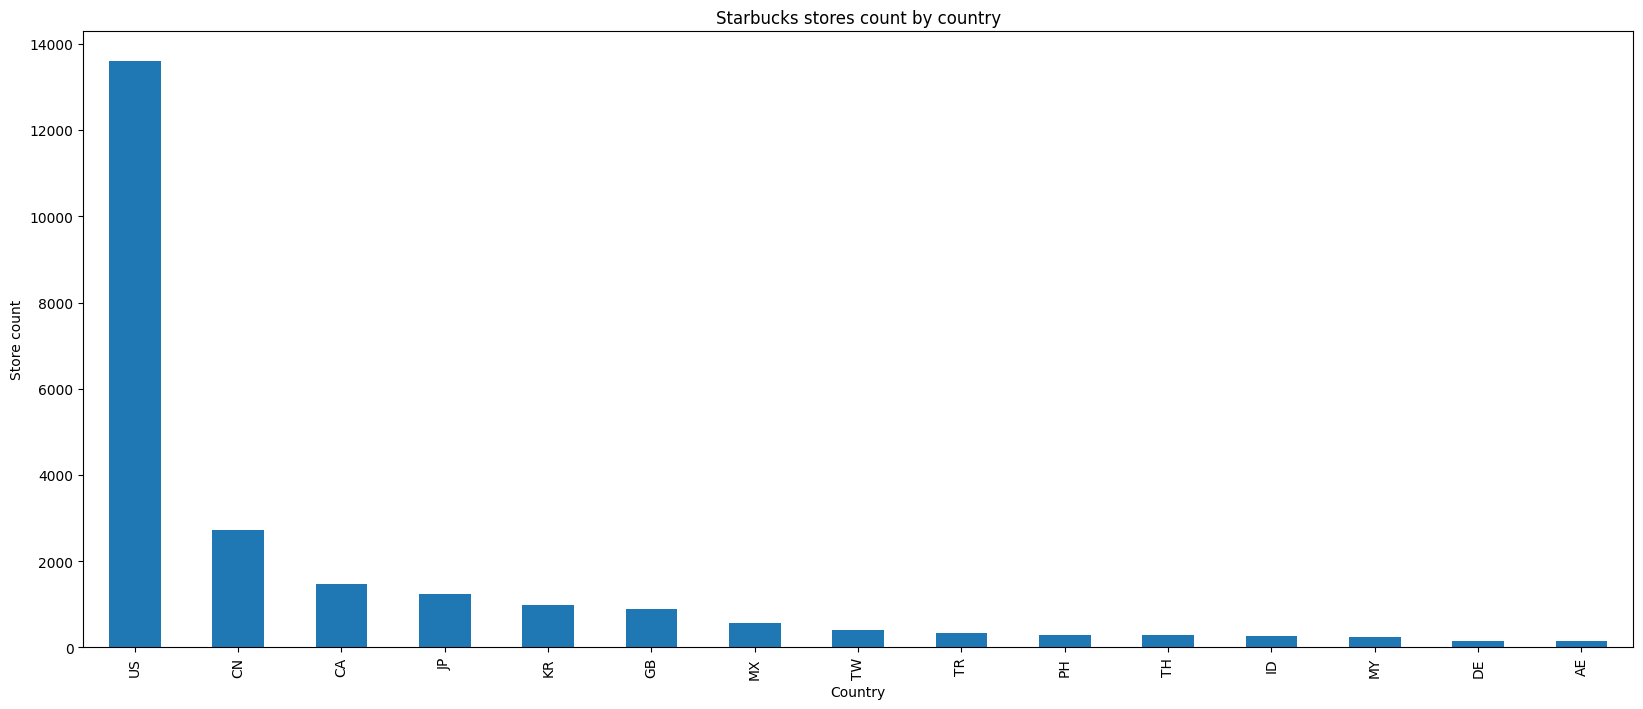

In [134]:
starbucks.groupby(by="Country").count()['City'].sort_values(ascending=False)[:15].plot(kind='bar', figsize=(20,8), fontsize=10, title='Starbucks stores count by country', ylabel='Store count')

In [135]:
starbucks.groupby(by=["Country",'State/Province']).count()

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
...                       ...           ...         ...             ...   
US      WV                 25            25          25              25   
        WY                 23            23          23              23   
VN      HN                  6             6           6               6   
        SG                 19            19          19              19   
ZA      GT                  3             3           3               3   

                        Street Address  City  Postcode  Phone Number  \
Country State/Province                                                 
AD      7                            1     1         1             1   
AE      AJ                           2     2         0             0   
        AZ                          48    48         7            20   
        DU                          82    82        16            50   
        FU                           2     2         1             0   
...                                ...   ...       ...           ...   
US      WV                          25    25        25            23   
        WY                          23    23        23            22   
VN      HN                           6     6         6             6   
        SG                          19    19        19            17   
ZA      GT                           3     3         3             2   

                        Timezone  Longitude  Latitude  
Country State/Province                                 
AD      7                      1          1         1  
AE      AJ                     2          2         2  
        AZ                    48         48        48  
        DU                    82         82        82  
        FU                     2          2         2  
...                          ...        ...       ...  
US      WV                    25         25        25  
        WY                    23         23        23  
VN      HN                     6          6         6  
        SG                    19         19        19  
ZA      GT                     3          3         3  

[545 rows x 11 columns]